In [106]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
from scipy.stats import linregress
from adjustText import adjust_text
%matplotlib inline

In [74]:
plt.style.use('fivethirtyeight')
#plt.style.available

In [9]:
def load_dataset(path):
    """
    Loads data from nba json files
    """
    curr_file = open(path)
    json_data = json.load(curr_file)
    result_data = json_data['resultSets'][0]
    headers = result_data['headers']
    shots = result_data['rowSet']
    data_frame = pd.DataFrame(data=shots, columns=headers)
    return data_frame

In [10]:
regular_stats = load_dataset("../../Data/nba_clutch_comparison/regular_stats.json")
clutch_stats = load_dataset("../../Data/nba_clutch_comparison/clutch_stats.json")

In [12]:
regular_stats.columns

Index([u'PLAYER_ID', u'PLAYER_NAME', u'TEAM_ID', u'TEAM_ABBREVIATION', u'AGE',
       u'GP', u'W', u'L', u'W_PCT', u'MIN', u'FGM', u'FGA', u'FG_PCT', u'FG3M',
       u'FG3A', u'FG3_PCT', u'FTM', u'FTA', u'FT_PCT', u'OREB', u'DREB',
       u'REB', u'AST', u'TOV', u'STL', u'BLK', u'BLKA', u'PF', u'PFD', u'PTS',
       u'PLUS_MINUS', u'DD2', u'TD3', u'GP_RANK', u'W_RANK', u'L_RANK',
       u'W_PCT_RANK', u'MIN_RANK', u'FGM_RANK', u'FGA_RANK', u'FG_PCT_RANK',
       u'FG3M_RANK', u'FG3A_RANK', u'FG3_PCT_RANK', u'FTM_RANK', u'FTA_RANK',
       u'FT_PCT_RANK', u'OREB_RANK', u'DREB_RANK', u'REB_RANK', u'AST_RANK',
       u'TOV_RANK', u'STL_RANK', u'BLK_RANK', u'BLKA_RANK', u'PF_RANK',
       u'PFD_RANK', u'PTS_RANK', u'PLUS_MINUS_RANK', u'DD2_RANK', u'TD3_RANK',
       u'CFID', u'CFPARAMS'],
      dtype='object')

In [300]:
top_20_scorers = regular_stats.loc[regular_stats.PTS_RANK <= 20]

In [301]:
top_20_clutch = clutch_stats.loc[clutch_stats.PLAYER_ID.isin(top_20_scorers.PLAYER_ID)]

In [302]:
top_20_scorers = top_20_scorers.sort_values(by='PLAYER_ID', axis=0)
top_20_clutch = top_20_clutch.sort_values(by='PLAYER_ID', axis=0)
top_20_scorers = top_20_scorers.reset_index()
top_20_clutch = top_20_clutch.reset_index()
adjusted_FTM = top_20_scorers.FTM.subtract(top_20_clutch.FTM)
adjusted_FTA = top_20_scorers.FTA.subtract(top_20_clutch.FTA)
top_20_scorers.FT_PCT = adjusted_FTM.divide(adjusted_FTA)

adjusted_FGM = top_20_scorers.FGM.subtract(top_20_clutch.FGM)
adjusted_FGA = top_20_scorers.FGA.subtract(top_20_clutch.FGA)
top_20_scorers.FG_PCT = adjusted_FGM.divide(adjusted_FGA)

0.713838268115


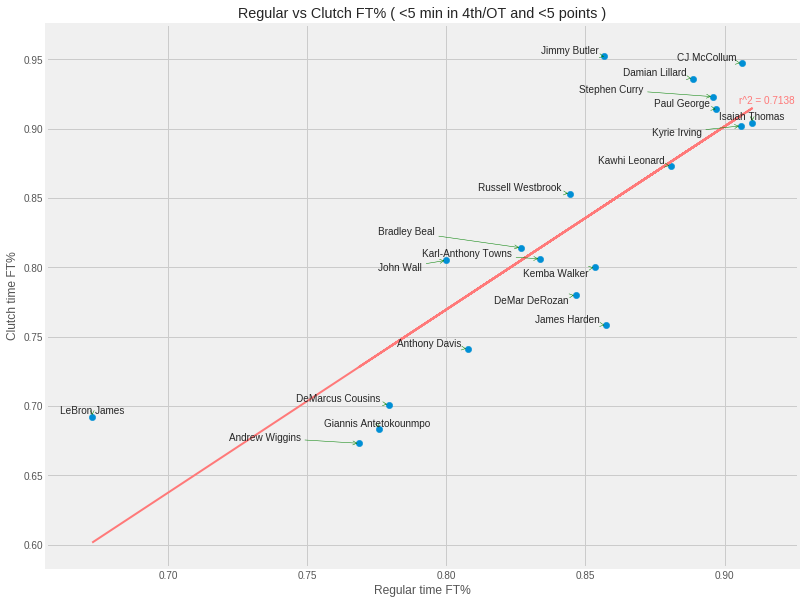

In [303]:
plt.figure(figsize=(12, 10))
ft_reg, ft_clutch = top_20_scorers.FT_PCT, top_20_clutch.FT_PCT
plt.scatter(ft_reg, ft_clutch, s = 40)
# linear regression

slope, intercept, r_value, p_value, std_err = linregress(ft_reg, ft_clutch)
print r_value**2
plt.plot(ft_reg, ft_reg * slope + intercept, '#ff7979', linewidth=2)
#plt.xlim(0.65, 0.95)
texts = []
for i in range(len(top_20_scorers)):
    texts.append(plt.text(
              top_20_scorers.iloc[i].FT_PCT, 
              top_20_clutch.iloc[i].FT_PCT, 
              s = top_20_scorers.iloc[i].PLAYER_NAME))

adjust_text(texts, x=ft_reg, y=ft_clutch, expand_points=(1.2, 1.2), expand_text=(1.0, 1.4), autoalign='y', 
            force_points=0.9,force_text=0.8, arrowprops=dict(arrowstyle="->", color='g', lw=0.5))

plt.title('Regular vs Clutch FT% ( <5 min in 4th/OT and <5 points )')
plt.xlabel('Regular time FT%')
plt.ylabel('Clutch time FT%')

plt.text(s='r^2 = 0.7138', x = 0.905, y=0.918, color='#ff7979')
plt.savefig('../../FT_pct_comp.png')

0.103813505635


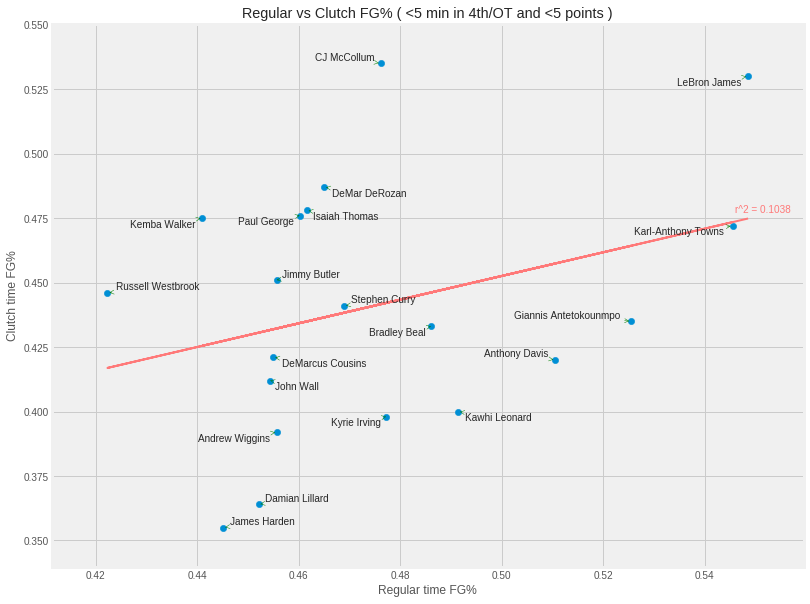

In [315]:
plt.figure(figsize=(12, 10))
fg_reg, fg_clutch = top_20_scorers.FG_PCT, top_20_clutch.FG_PCT
plt.scatter(fg_reg, fg_clutch, s = 40)
# linear regression

slope, intercept, r_value, p_value, std_err = linregress(fg_reg, fg_clutch)
print r_value**2
plt.plot(fg_reg, fg_reg * slope + intercept, '#ff7979', linewidth=2)
#plt.xlim(0.65, 0.95)
#plt.ylim(0.35, 0.55)
texts = []
for i in range(len(top_20_scorers)):
    texts.append(plt.text(
              top_20_scorers.iloc[i].FG_PCT, 
              top_20_clutch.iloc[i].FG_PCT, 
              s = top_20_scorers.iloc[i].PLAYER_NAME))

adjust_text(texts, x=fg_reg, y=fg_clutch, expand_points=(1.2, 1.2), expand_text=(1.0, 1.4), autoalign='xy', 
            force_points=0.9,force_text=0.8, arrowprops=dict(arrowstyle="->", color='g', lw=0.5))

plt.title('Regular vs Clutch FG% ( <5 min in 4th/OT and <5 points )')
plt.xlabel('Regular time FG%')
plt.ylabel('Clutch time FG%')

plt.text(s='r^2 = 0.1038', x = 0.546, y=0.477, color='#ff7979')
plt.savefig('../../FG_pct_comp.png')

In [319]:
top_20_clutch.FG3A

0     31
1     58
2     44
3     28
4     10
5     19
6     42
7     33
8     31
9     56
10    21
11    33
12    50
13    20
14    45
15    49
16    29
17     8
18    17
19    20
Name: FG3A, dtype: int64